# Introduction

INTRO

## Initializing

In [37]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter as scf


## First Looks at Vehicle Data

In [12]:
# Load dataset into dataframe
df = pd.read_csv('../vehicles_us.csv')

The only dataset we are looking at is stored under 'vehicles_us.csv,' which has 51,525 entries on car data.

In [8]:
# Basic Info 
print(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


## Cleaning Vehicle Data

There is a 'date_posted' column we should convert to datetime. 

In [22]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

Additionally, there are some NaN entries for 'model_year,' 'cylinders,' 'odometer,' 'paint_color', and 'is_4wd' but we should only replace these for categorical data as for the quantitative columns NaNs are meaningful data points. We will therefore only clean up the 'paint_color' and 'is_4wd' columns.

In [10]:
# Demonstrating values of 'is_4wd' column
display(df['is_4wd'].unique())

array([ 1., nan])

 The 'is_4wd' column only has values of 1.0 and NaN, so NaN values must indicate that the vehicle is not 4-wheel-drive.

In [14]:
# Wipe NaNs from paint color column
df['paint_color'] = df['paint_color'].fillna(0)

# Wipe NaNs from 4WD column and Unify the boolean values  
df['is_4wd'] = df['is_4wd'].astype('str')
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] != 'nan', 'No')
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] != '1.0', 'Yes')
display(df['is_4wd'].value_counts())

is_4wd
No     25953
Yes    25572
Name: count, dtype: int64

Now we will check for dupicate row entries.

In [20]:
# Check for duplicates

dup = df[df.duplicated()]

if len(dup) >= 1:
    display(dup)
else:
    print('There are no duplicate rows.')

There are no duplicate rows.


# Summary Analysis

## Time-based Metrics: Vehicle Age and Days Listed 

It is reasonable to expect that the older a car is, the more likely it has been to have been driven, and thus the more likely the odometer has been 

990000.0

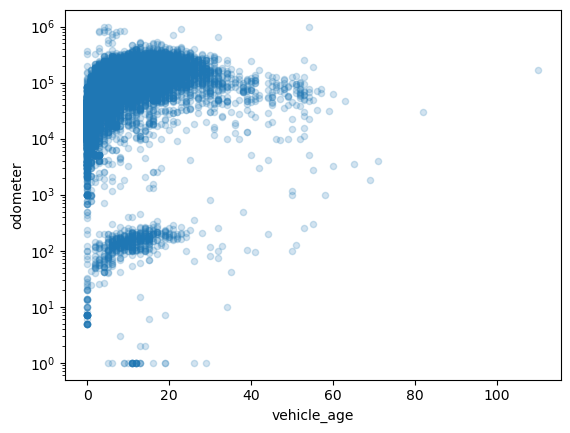

In [44]:
# Relating vehicle age to odometer. We should expect a linear relationship
df['vehicle_age'] = df['date_posted'].dt.year - df['model_year']
display(df['odometer'].max())
df.plot(x='vehicle_age', y='odometer', kind='scatter', alpha=0.2)
plt.yscale('log')

# Borrowed code that sets tick values in logarithmic axis to standard
plt.show()

# Testing Hypotheses